In [ ]:
# 한글처리
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
# 런타임 재시작 이후
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/전국도시공원정보표준데이터.csv',encoding='euc-kr')
df = pd.concat( [ df.loc[:, :'공원면적'], df.loc[:, '전화번호' : ] ],axis=1 )
df[['소재지도로명주소',	'소재지지번주소']] = df[['소재지도로명주소',	'소재지지번주소']].ffill(axis=1)
df[['소재지도로명주소',	'소재지지번주소']] = df[['소재지도로명주소',	'소재지지번주소']].bfill(axis=1)

In [3]:
df.drop(columns=['관리번호','소재지지번주소','제공기관코드','제공기관명'], inplace=True)

In [4]:
df.head()

,공원명,공원구분,소재지도로명주소,위도,경도,공원면적,전화번호,데이터기준일자
0,녹색소공원,소공원,서울특별시 용산구 효창동 287-6,37.539217,126.962694,1569.9,02-2199-7605,2022-12-20
1,푸름샘 소공원(소1-1),소공원,세종특별자치시 마음안로 161,36.516117,127.233781,1820.0,044-301-3613,2022-12-14
2,솔숲 소공원(소1-2),소공원,세종특별자치시 만남1북로 73,36.508995,127.230040,1037.0,044-301-3613,2022-12-14
3,마디꽃 수변공원(수1-1),수변공원,세종특별자치시 다솜로 38,36.495962,127.257316,4928.0,044-301-3633,2022-12-14
4,꽃 수변공원(수2-3),수변공원,세종특별자치시 나리로 26-10,36.473133,127.254482,3575.0,044-301-3613,2022-12-14


In [5]:
# 데이터 타입조사하고 적절한 타입으로 변경
# 결측치 확인하고 조치
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17525 entries, 0 to 17524
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   공원명       17525 non-null  object 
 1   공원구분      17525 non-null  object 
 2   소재지도로명주소  17525 non-null  object 
 3   위도        17513 non-null  float64
 4   경도        17514 non-null  float64
 5   공원면적      17525 non-null  float64
 6   전화번호      16343 non-null  object 
 7   데이터기준일자   17525 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.1+ MB


In [6]:
# 결측치 유무 확인
df.isnull().sum()

공원명            0
공원구분           0
소재지도로명주소       0
위도            12
경도            11
공원면적           0
전화번호        1182
데이터기준일자        0
dtype: int64

In [44]:
df['전화번호'].apply( lambda x :  len(x) == 0 | x.isspace() ).sum()
# test = ""
# test.isspace()
# if len(test) == 0 | test.isspace():
#   print("true")
# else:
#   print('false')

,공원명,공원구분,소재지도로명주소,위도,경도,공원면적,전화번호,데이터기준일자
78,백현체육공원,체육공원,경상북도 구미시 산동면 백현리 79,36.186429,128.478491,90967.0,NaN,2022-06-09
79,둘모아공원,어린이공원,경상북도 구미시 봉곡동 584-2,36.148431,128.316594,4279.0,NaN,2022-06-09
80,다붓소공원,소공원,경상북도 구미시 봉곡동 765 일원,36.155883,128.311526,805.0,NaN,2022-06-09
81,다붓1공원,어린이공원,경상북도 구미시 봉곡동 457-1,36.156392,128.314372,1585.0,NaN,2022-06-09
82,다붓2공원,어린이공원,경상북도 구미시 봉곡동 767,36.154808,128.314372,1637.0,NaN,2022-06-09
...,...,...,...,...,...,...,...,...
17510,동망공원,근린공원,전라남도 완도군 완도읍 장보고대로 330-3,34.313351,126.765417,645213.0,NaN,2022-12-21
17511,노화공원,근린공원,전라남도 완도군 노화읍 이목25번길 49-13,34.178833,126.571583,256700.0,NaN,2022-12-21
17512,달도지구농어촌테마공원,문화공원,전라남도 완도군 군외면 청해진로 142,34.394139,126.638688,18640.0,NaN,2022-12-21
17513,군내리 공원,소공원,전라남도 완도군 완도읍 청해진남로59번길 10-3,34.309605,126.754337,128.0,NaN,2022-12-21


In [33]:
# 위도 경도의 이상치를 찾아보자.
# boxplot
# x : 경도  y : 위도  그려보자

# 이상치를 제거하는 방법
# 시각적으로 찾는 방법  boxplot, scatter plot 을 이용해서
# z-score를 이용하는 방법 평균과 표준편차로 값을 구한다음 해당 threshold(임계치) 를 초과하는 데이터를 이상치로 판단
# IQR : 4분위수에서  Q3 - Q1    Q1 - 1.5*IQR < x <  Q1 + 1.5*IQR

<Axes: xlabel='경도', ylabel='위도'>

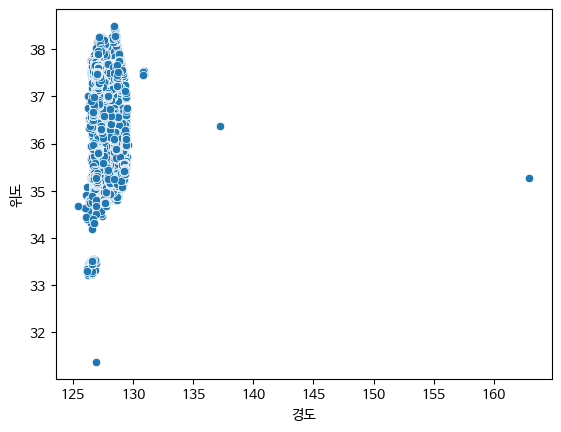

In [34]:
import seaborn as sns
sns.scatterplot(data = df , x = '경도', y='위도')

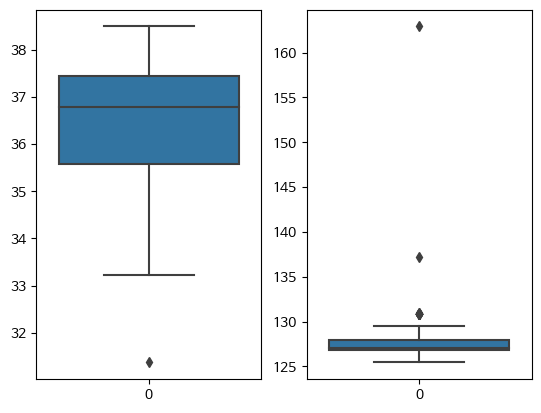

In [38]:
plt.subplot(1,2,1)
sns.boxplot(df['위도'])
plt.subplot(1,2,2)
sns.boxplot(df['경도'])
plt.show()

In [46]:
df.describe().loc[['25%','75%'],['위도','경도']]

,위도,경도
25%,35.569929,126.864630
75%,37.450047,127.953347


In [ ]:
# z- score 값 구하기
#  Z = (X - μ) / σ  x: 개별 값  μ:전체평균  σ: 전체표준편차
# threshold를 초과하는 데이터를 이상치  일반적으로 2~3으로 설정

In [ ]:
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
import numpy as np
# Z-Score 계산
z_scores = np.abs((data - np.mean(data)) / np.std(data))
# threshold 값 설정
threshold = 3
# threshold를 초과하는 데이터 제거
data_without_outliers = data[z_scores < threshold]

In [52]:
z_scores = np.abs((df['위도'] - np.mean(df['위도'])) / np.std(df['위도']))
(z_scores >=3 ).sum()

59